# LIBRARIES

* Execute this cell to import the libraries we need.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

<br/><br/>
<!--  -->

# WARMUP

## HERON'S METHOD 
<!-- TIGHTEN UP PHRASING HERE -->
Iterative numerical algorithms are a pillar of computational science, and we will use them throughout this virtual lab.  
Here, you will write a Python function implementing one of the simplest ones.  
  
Heron's algorithm for iteratively calculating the square root of a number N is as follows:
1. Start with a positive guess, $g$.
2. Generate a new guess, $g_{new}$, with the following formula:  
       $g_{new} = \frac{( g + \frac{N}{g} )}{2}$  
3. Repeat step 2 until desired convergence is achieved.

### CODE
* Write two functions to approximate the square root of a number using Heron's method.
* The first should use three iterations.
* The second should use ten iterations. 
* Test each function using the numbers 10, 27, 81, and 2401.

In [34]:
def square_root_3_iter(number):
    guess = number / 2
    for i in range(0,3):
        guess = (guess + number / guess) / 2
    return guess

In [35]:
def square_root_10_iter(number):
    guess = number / 2
    for i in range(0,10):
        guess = (guess + number / guess) / 2
    return guess

In [36]:
inputs = [10,27,81,2401]
for inp in inputs:
    print(f"input: {inp}")
    print(f"3 iterations: {square_root_3_iter(inp)}")
    print(f"10 iterations: {square_root_10_iter(inp)}")
    print()

input: 10
3 iterations: 3.162319422150883
10 iterations: 3.162277660168379

input: 27
3 iterations: 5.211913542366209
10 iterations: 5.196152422706632

input: 81
3 iterations: 9.497456198181656
10 iterations: 9.0

input: 2401
3 iterations: 155.27783620631706
10 iterations: 49.0



<br/><br/>
<br/><br/>
<!--  -->

# OPTICS

## PART 1 - DISTANCE AND TIME FUNCTIONS
We will be simulating the behavior of light using two known properties:

1. The speed of light changes depending on the medium it travels through.  
2. A light ray always follows the path of shortest time between two points.
   
This will allow us to explore some interesting emergent behavior.  
Before we can do this, we need functions to calculate distance and travel time.

### CODE

* Complete the functions for distance and time.
* Test your code using the provided blocks to ensure it functions properly.

In [37]:
def distance(p1,p2):
    '''
    Parameters:
    p1, p2 - positions (light seconds), vectors (as list, tuple, or np.array)
    Returns:
    dist   - scalar distance in light seconds between p1 and p2
    '''
    p1 = np.array(p1)
    p2 = np.array(p2)
    dist = np.linalg.norm(p1 - p2)
    #or something like
    dist = np.sqrt( (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 ) 
    return dist

In [38]:
def total_time(p1,p2,p3,s1,s2):
    '''
    Parameters:
    p1, p2, p3  -  positions (light seconds), vectors (as list, tuple, or np.array)   
    s_1, s_2    -  speeds (as multiples of c), scalar
    Returns: 
    travel_time - Total time for path p1 => p2 => p3, scalar
    '''
    
    p1 = np.array(p1)
    p2 = np.array(p2)
    p3 = np.array(p3)
    t1 = distance(p1,p2) / s1
    t2 = distance(p2,p3) / s2 
    travel_time = t1 + t2
    return travel_time

In [39]:
distance_test = [
    # input  | expected output
    (( [1.0,0.0],[0.0,1.0] ), np.sqrt(2)),
    (( [0.0,0.0],[1.0,0.0] ), 1),
    (( [0.0,0.0],[np.sqrt(3),1.0] ), 2) 
]
for test_input, expected_output in distance_test:
    point1, point2 = test_input
    actual_output = distance(point1,point2)
    print(f"Expected output: {expected_output:4f}")
    print(f"Actual output: {actual_output:.4f}")
    print()

Expected output: 1.414214
Actual output: 1.4142

Expected output: 1.000000
Actual output: 1.0000

Expected output: 2.000000
Actual output: 2.0000



In [40]:
time_test = [
    # input                                 | expected output
    (( [0.0,1.0],[0.5,0.5],[1.0,0.0],2,4 ), 0.5303),
    (( [0.0,1.0],[0.3,0.5],[1.0,0.0],3,5 ), 0.3664),
    (( [0.0,1.0],[0.7,0.5],[1.0,0.0],3,5 ), 0.4034),
]
for test_input, expected_output in time_test:
    p1, p2,p3,s1,s2 = test_input
    actual_output = total_time(p1,p2,p3,s1,s2)
    print(f"Expected output: {expected_output:.4f}")
    print(f"Actual output: {actual_output:.4f}")
    print()

Expected output: 0.5303
Actual output: 0.5303

Expected output: 0.3664
Actual output: 0.3664

Expected output: 0.4034
Actual output: 0.4034



### SHORT RESPONSE QUESTIONS
1. According to the tests, do your functions produce the expected values?
2. Why is it important that we test our code?
### ANSWER

1. Yes, for the test set of points my functions give correct outputs.
2. We must test our code because it is very easy to make mistakes which might not be readily apparent when reading it.

<br/><br/>
<!--  -->

## PART 2 - PATH OF LEAST TIME   
We will plot the path of light as it travels through two different media.  
Observe how the point at which the light ray intersects the boundary of the two media changes its travel time.

### GIVEN FUNCTIONS

* Execute the blocks containing the given functions. Don't modify these.

In [41]:
from matplotlib.patches import Arc

def light_travel_plot(p1,p2,p3,incident_angle,refractive_angle,v1=1.0,v2=0.8,travel_time=1.0): #give them this function
    x = np.array([p1[0],p2[0],p3[0]])
    y = np.array([p1[1],p2[1],p3[1]])

    #draw points connecting lines
    plt.scatter(x,y)
    plt.plot(x, y, linestyle='-', color='red')

    plt.xlim(-0.1,1.1) 
    plt.ylim(0,1)
    #fill medium below interface
    plt.axhspan(0, p2[1], color='gray', alpha=0.5)

    #calculate normal vector at interface
    incident_norm = np.array([0,0.5]) 
    refractive_norm = np.array([0,-0.5]) 
    
    plt.quiver(p2[0], p2[1], incident_norm[0], incident_norm[1],
               angles='xy', scale_units='xy', scale=0.1, color='blue', label='Normal',
              alpha = 0.3)

    plt.quiver(p2[0], p2[1], refractive_norm[0], refractive_norm[1],
               angles='xy', scale_units='xy', scale=0.1, color='blue', label='Normal',
              alpha = 0.3)
    
    arc = Arc(p2,0.3,0.3,theta1=90,theta2=90+np.degrees(incident_angle),color='green')
    plt.gca().add_patch(arc)
    
    arc = Arc(p2,0.3,0.3,theta1=270,theta2=270+np.degrees(refractive_angle),color='green')
    plt.gca().add_patch(arc)

    plt.text(p2[0] + 0.01, p2[1] + 0.15, f'{np.degrees(incident_angle):.1f}°', color='black')
    plt.text(p2[0] - 0.08, p2[1] - 0.15, f'{np.degrees(refractive_angle):.1f}°', color='black')

    plt.text(p2[0] - 0.25,p2[1] + 0.25, f'$s1 = {v1}$',color = 'black',fontsize='large')
    plt.text(p2[0] - 0.25,p2[1] - 0.25, f'$s2 = {v2}$', color = 'black',fontsize='large')

    plt.text(0.05,0.60,f't = {travel_time:.4f}',color = 'red',fontsize='large')
    
    plt.show()

In [42]:
def calculate_angles(p1,p2,p3): #through a line at x = 0.5
    vec_1 = p1 - p2
    intersection_line = [0,1]
    vec_1_norm = vec_1 / np.linalg.norm(vec_1)
    angle_between_1 = np.arccos(np.dot(vec_1_norm, intersection_line))

    vec_2 = p3 - p2
    intersection_line = [0,-1]
    vec_2_norm = vec_2 / np.linalg.norm(vec_2)
    angle_between_2 = np.arccos(np.dot(vec_2_norm, intersection_line))
    
    return angle_between_1,angle_between_2

In [43]:
def calculate_and_plot(top_x,mid_x,low_x,v1,v2,plot=True):
    p1 = np.array([top_x,1])
    p2 = np.array([mid_x,0.5])
    p3 = np.array([low_x,0])
    angle_1,angle_2 = calculate_angles(p1,p2,p3)
    time = total_time(p1,p2,p3,v1,v2)
    if plot:
        light_travel_plot(p1,p2,p3,angle_1,angle_2,v1,v2,time) 
    return (angle_1,angle_2,time)

In [44]:
def make_travel_time_function(top_x,low_x,v1,v2):
    p1 = np.array([top_x,1])
    p3 = np.array([low_x,0])
    def calculate_time(mid_x):
        p2 = np.array([mid_x,0.5])
        time_val = float(total_time(p1,p2,p3,v1,v2))
        return time_val
    return calculate_time

### CODE

* Choose three different, progressively better guesses for the x coordinate of the boundary intersection for the path of least time. Display the resulting path and time using calculate_and_plot().
* Find the intersection with the shortest travel time by numerical optimization using scipy.optimize.minimize_scalar(). __This part is provided for you, but leave comments explaining what each line does.__


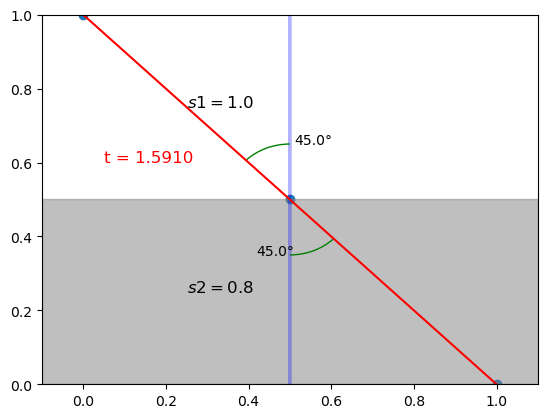

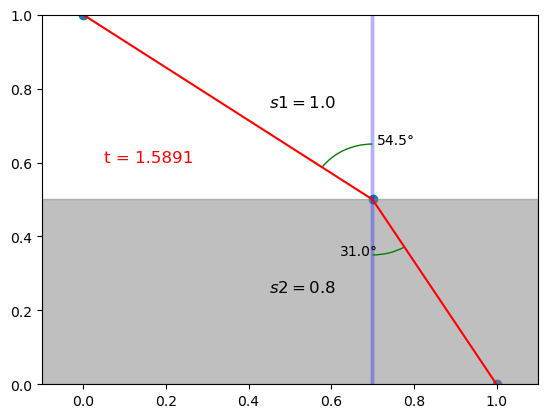

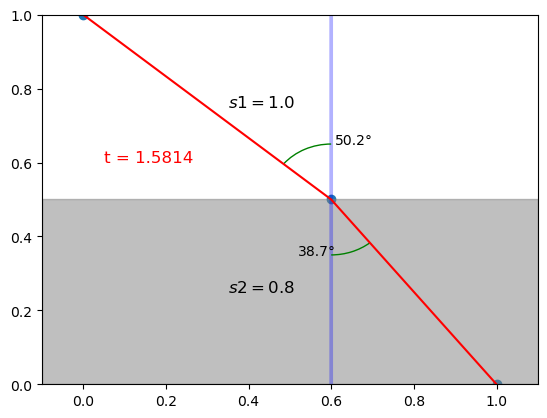

In [45]:
top_x = 0.0
low_x = 1.0
s1 = 1.0
s2 = 0.8

mid_x = 0.5
data =calculate_and_plot(top_x,mid_x,low_x,s1,s2)
mid_x = 0.7
data =calculate_and_plot(top_x,mid_x,low_x,s1,s2)
mid_x = 0.6
data =calculate_and_plot(top_x,mid_x,low_x,s1,s2)

#run this function three times with different values of mid_x

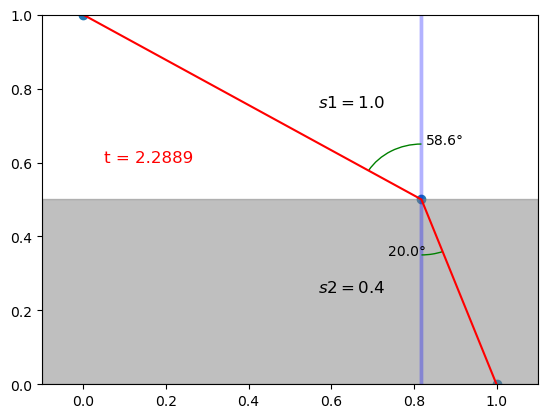

optimized boundary x-coordinate: 0.8184


In [64]:
#make a function which only accepts one variable, for use with minimize_scalar()
one_var_function = make_travel_time_function(top_x,low_x,s1,s2) 
#pass the function to minimize_scalar to find the input that produces the smallest output
data = scipy.optimize.minimize_scalar(one_var_function) 
#extract the ideal midpoint x value from this
best_x = data['x']
#show what the plot (and time) looks like when we use that value for boundary intersection
data = calculate_and_plot(top_x,best_x,low_x,s1,s2)
#print out the optimized coordinate
print(f'optimized boundary x-coordinate: {best_x:.4f}')

### SHORT RESPONSE QUESTIONS
1. For the numerically solved path of least time, which angle is larger - incident or refracted?
2. Would this hold if we changed the position of the top and bottom points? Why?
3. What if we swapped the respective speeds of light for each medium- would this relationship still be true? Why?
### ANSWER

1. The angle on the top, where the speed of light is faster, is larger than the angle inside the medium where it is slower.  

2. This relationship will likely stay the same regardless of the positions of the two points, unless they are right on top of each other.   

3. If light were slower in the top medium, the top angle would be smaller than the bottom angle. It would make sense that the larger angle will be on whichever side the speed of light is faster, since this means light spends more time on that side.

<br/><br/>
<!--  -->

## PART 3 - INCIDENT AND REFRACTED ANGLE
Now, observe how the incident and refracted angle change for the path of shortest time, as we change the start and end point of the light ray.
  
<!-- No obvious questions to answer?  Maybe these should be put in the short answer portion or dispersed throughout the activity so that the students don't get confused. -->


### GIVEN FUNCTIONS

* Execute the blocks containing the given functions. Don't modify these.

In [65]:
from scipy.optimize import minimize_scalar
def theta_vals(s1,s2,plot=True):
    p1_x_vals = np.linspace(0.0,1.0,6)
    inc_angles = []
    ref_angles = []
    for p1_x in p1_x_vals:
        best_x = scipy.optimize.minimize_scalar(make_travel_time_function(p1_x,1.0,s1,s2))['x']
        inc_angle, ref_angle, time = calculate_and_plot(p1_x,best_x,1.0,s1,s2,plot)
        inc_angles.append(inc_angle)
        ref_angles.append(ref_angle)
    return inc_angles,ref_angles

### CODE

* Use theta_vals to obtain refraction plots for several different starting positions of points. We will use this to explore the relationship between incident and refracted angle.
 
* Plot refracted versus incident angle, by plugging inc_angles and ref_angles into plt.plot(x,y).

* Plot sin(refracted) versus sin(incident) in the same manner. _Hint: inc_angles and ref_angles are __np.array__ objects, so we can do math with them. Try the np.sin() function._

1.0 0.4


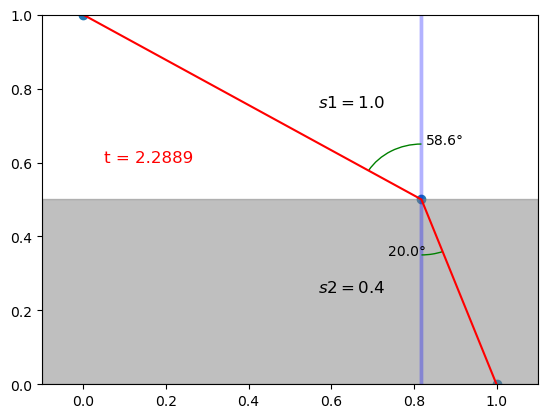

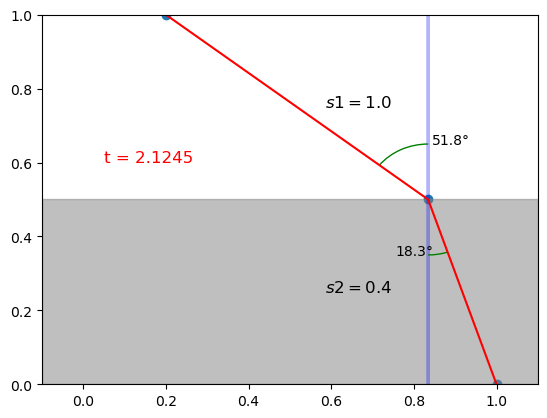

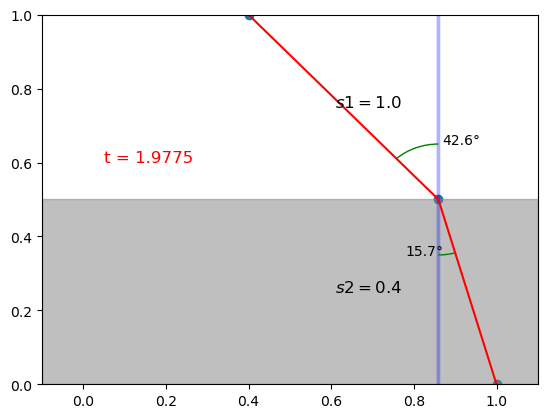

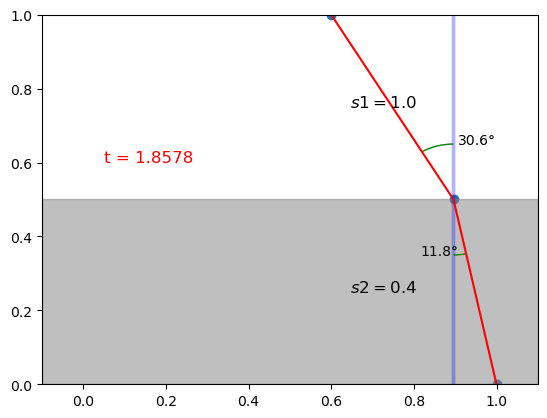

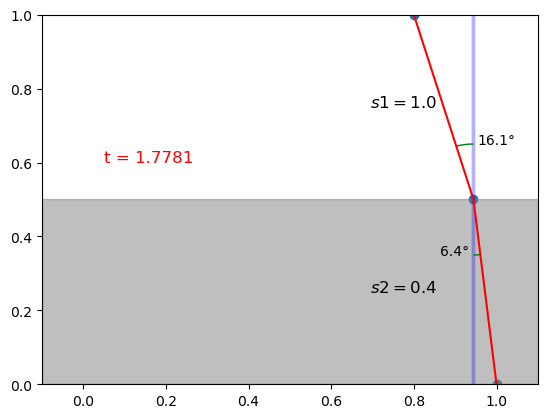

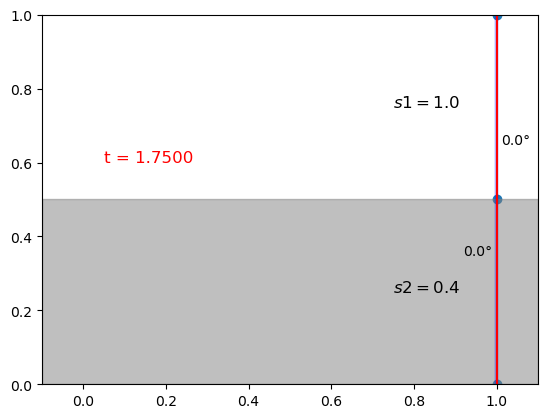

In [48]:
# choose a set of values for s1 and s2!
s1 = 1.0
s2 = 0.4
inc_angles, ref_angles = theta_vals(s1,s2,plot=True)

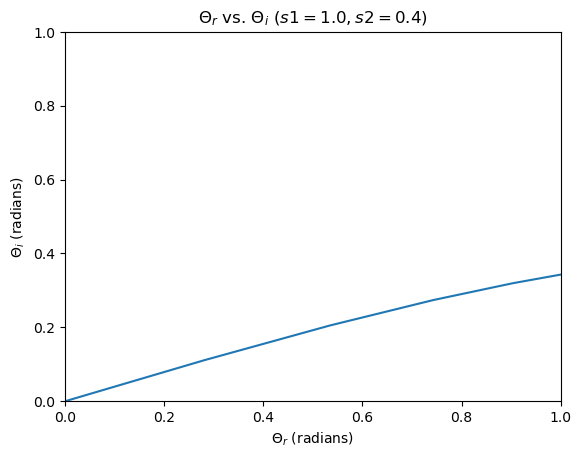

In [49]:
#plot incident vs refracted angles here!
plt.plot(inc_angles, ref_angles)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title(f'$\Theta{{}}_r$ vs. $\Theta{{}}_i$ ($s1 = {s1}, s2 = {s2}$)')
plt.xlabel(f'$\Theta{{}}_r$ (radians)')
plt.ylabel(f'$\Theta{{}}_i$ (radians)')
plt.show()

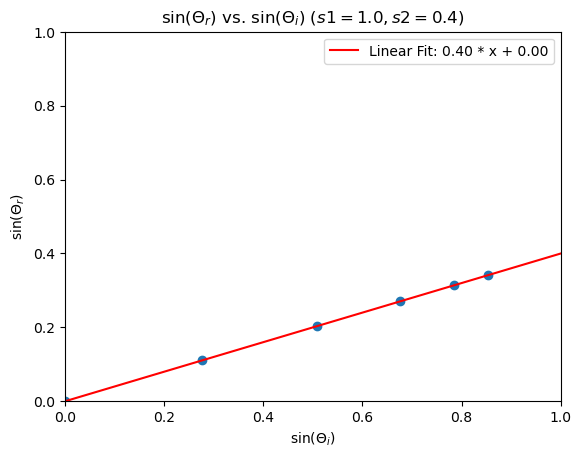

In [50]:
#plot sin incident vs sin refracted here!
x = np.sin(inc_angles)
y = np.sin(ref_angles)
plt.scatter(x,y)
slope, intercept = np.polyfit(x,y,1)
fit_x = np.linspace(0,1,100)
fit_y = fit_x * slope + intercept
plt.plot(fit_x,fit_y,
         label=f'Linear Fit: {slope:.2f} * x + {intercept:.2f}',
         color='red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title(f'sin($\Theta{{}}_r$) vs. sin($\Theta{{}}_i$) ($s1 = {s1}, s2 = {s2}$)')
plt.xlabel('sin($\Theta_i$)')
plt.ylabel('sin($\Theta_r$)')
plt.legend()
plt.show()

### SHORT RESPONSE QUESTIONS
1. What do we notice about the relationship between $sin(\theta{}_{r})$ and $sin(\theta{}_{i})$ for this set of speeds? 
2. If there is a proportionality constant, what is its value equal to?
### ANSWER

1. We notice that $sin(\theta{}_{r})$ is directly proportional to $sin(\theta{}_{i})$
2. The proportionality constant is equal to $\frac{s2}{s1}$. ($s2$ would also be an acceptable answer for this part!)

<br/><br/>
<!--  -->

## PART 4 - SNELL'S LAW
We are well on our way to rediscovering an important law governing the refraction of light. 

Definition of Refractive Index:   
$\eta_{med} = \frac{c}{v_{med}}$   
Snell's Law:   
$\eta_r \cdot sin(\theta_r) = \eta_i \cdot sin(\theta_i)$  
<!-- No obvious questions to answer?  Maybe these should be put in the short answer portion or dispersed throughout the activity so that the students don't get confused. -->


### GIVEN FUNCTIONS

* Execute the blocks containing the given functions. Don't modify these.

In [51]:
from scipy.stats import linregress

def plot_snell_lines(pairs):
    """
    Overlay sin(Theta_r) vs sin(Theta_i) for multiple (s1, s2) pairs.
    """
    slopes = []
    ratios = []
    plt.figure(figsize=(8, 6))
    
    for s_1, s_2 in pairs:
        inc, ref = theta_vals(s_1, s_2, plot=False)
        sin_inc = np.sin(inc)
        sin_ref = np.sin(ref)
        output = np.polyfit(sin_inc.copy(),sin_ref.copy(),1)
        slope,intercept = output
        slopes.append(slope)
        ratios.append(s_2 / s_1)
        
        plt.plot(sin_inc.copy(), sin_ref.copy(), label=f"$s1$={s_1}, $s2$={s_2}, slope={slope:.2f}")

    # Customize plot
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title("sin(Θ_r) vs. sin(Θ_i)")
    plt.xlabel('sin(Θ_i)')
    plt.ylabel('sin(Θ_r)')
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()
    
    #######################
    # Plot slope vs ratio
    plt.figure(figsize=(8, 6))
    slope_vs_ratio = linregress(ratios, slopes)
    plt.plot(ratios, slopes, 'o', label=f"Slope = {slope_vs_ratio.slope:.2f}x + {slope_vs_ratio.intercept:.2f}")
    plt.plot(ratios, slope_vs_ratio.intercept + slope_vs_ratio.slope * np.array(ratios), '-', color='red')
    
    # Customize plot
    plt.title("Slopes vs. Velocity Ratio (s1/s2)")
    plt.xlabel("Velocity Ratio ($s1/s2$)")
    plt.ylabel("Slope of sin(Θ_r) vs. sin(Θ_i)")
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

### CODE
* Add to the list of pairs with four more sets of speeds of light in each medium.
* Use plot_snell_lines() to observe the relationship between sin(refracted) versus sin(incident) across the different combinations of speeds.

1.0 0.8
0.8 1.0
0.6 0.6
0.4 1.0
1.0 0.3


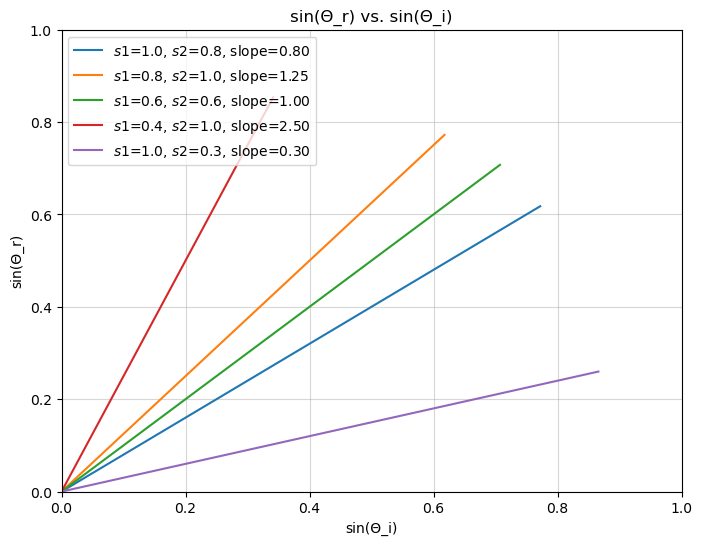

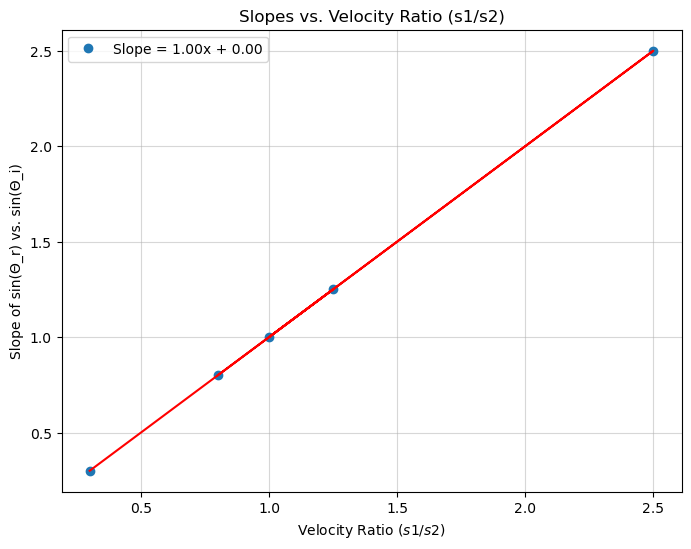

In [52]:
#plot the relationship between sin(angle) for different speeds!
v1_v2_pairs = [
    (1.0,0.8),
    (0.8,1.0),
    (0.6,0.6),
    (0.4,1.0),
    (1.0,0.3),
    #add four more pairs of speeds to try!
]    
plot_snell_lines(v1_v2_pairs)

### SHORT RESPONSE QUESTIONS
1. Write an equation in the form  __y = m * x + b__  relating $sin(\theta{}_{r})$, $sin(\theta{}_{i})$, $s_1$, and $s_2$, as found from our simulations.  
(where $\theta{}_{r}$ is the angle of refraction, $\theta{}_{i}$ is the angle of incidence, and $s_1$ and $s_2$ are the speed of light in medium 1 and 2 respectively)
2. Prove using algebra that this expression is equivalent to Snell's Law. Show each step. 
3. Is this result surprising? Why?
### ANSWER

1. $sin(\theta_r) = \frac{v_r}{v_i} \cdot sin(\theta_i)$
2. 
$\eta_r \cdot sin(\theta_r) = \eta_i \cdot sin(\theta_i)$ | (Snell's Law)  
$\frac{c}{v_r} \cdot sin(\theta_r) = \frac{c}{v_i} \cdot sin(\theta_i)$   
$sin(\theta_r) = \frac{v_r}{c} \cdot \frac{c}{v_i} \cdot sin(\theta_i)$  
$sin(\theta_r) = \frac{v_r}{v_i} \cdot sin(\theta_i)$ | (Our expression)
4. This result is quite interesting because we see that it is the inevitable result of only the fact that light finds the path of least time from one point to another, even though it is not immediately intuitive that this should be true. Simulating the outcomes of the basic principles allowed us to derive it.

<br/><br/>
<br/><br/>
<!--  -->

# WAVES

## PART 1 - STANDING WAVES
Quantum mechanics is a very important part of this course, and its principles can be unintuitive. It tells us that particles such as electrons, protons, and photons behave as both waves _and_ particles.  
It is surprisingly profound that these particles behave like waves, and one reason for this should become clear when we consider the behavior of classical standing waves.  
To explore the properties of standing waves, we will first fit a curve to some experimental data using a numerical optimization routine, much like we did to find the path of shortest travel for light.

### GIVEN FUNCTIONS
* Execute the blocks containing the given functions. 
* __Leave comments on the fit_curve function explaining what each line does.__

In [2]:
def surface_standing_wave(A,k,w,p1,p2):
    x = np.linspace(0,10,100)
    t = np.linspace(0,0.2,100)
    X, T = np.meshgrid(x, t)  # Create a grid
    Y = standing_wave((X,T),A,k,w,p1,p2)
    return X, T, Y

In [3]:
def plot_wave(x,y,t,params=None): #this function is given to them
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    if params is not None:
        if type(params) is dict:
            params = list([params['A'],params['k'],params['w'],params['p1'],params['p2']])
        X,T,Y = surface_standing_wave(*params)
        time_norm = (T - T.min()) / (T.max() - T.min())
        cmap = plt.get_cmap('viridis')
        colors = cmap(time_norm)
        ax.plot_surface(X, T, Y, facecolors=colors, rstride=1, cstride=1, alpha=0.4)
    
    ax.scatter(x, t, y, color='red', s=5, label='Data Points')
    ax.set_zlim(-2, 2)
    ax.set_xlabel('Position (cm)')
    ax.set_ylabel('Time (s)')
    ax.set_zlabel('Height (cm)')

    plt.show()

In [4]:
def fit_curve(data,guess_parameters,plot=True): #accepts our data and our first guess for paramters, as well as a flag for whether we want to plot our results
    # comment me!
    p = guess_parameters #just for readability
    initial_guess = [p['A'],p['k'],p['w'],p['p1'],p['p2']]  #put the paramters we pass into list format from dict format
    params, covariance = scipy.optimize.curve_fit( #using the curve fit function from the scipy.optimize module
        standing_wave, #the function we want to use to fit
        (data['length'],data['time']), #the input data for the function
        data['height'], #the output data we expect 
        p0=initial_guess #an initial guess of the parameters for which we are optimizing
    )
    if plot: #only do this if plot is set to True
        plot_wave(data['length'],data['height'],data['time'],params) #plot the data overlaid with the function we optimized
    return params #return the optimized parameters

### CODE
* Ensure you have the provided .csv files in the same folder as this notebook before proceeding.
* Write a formula for a standing wave. This formula will be fit to experimental data numerically.
* Fit your curve to the points taken for the first, second, and third harmonics of the vibrating string.

In [5]:
def standing_wave(x_t,A, k, w , p1 , p2): 
    '''
    Parameters:
    x_t : x and time coordinates, as an array of two numbers
    A   : Amplitude, scalar
    k   : wavenumber (space), scalar
    w   : frequency  (time), scalar
    p1  : phase shift for space, scalar
    p2  : phase shift for time, scalar
    returns :
    y   : height of string at given position and time, scalar
    '''
    x,t = x_t #we must pass these as one variable to use for numerical fitting routines!
    #write a simple function using sine and cosine for the height of the string as function of x and t.
    y = A * np.sin(k * x + p1) * np.cos(w * t + p2) #this is the part the students should write
    return y

In [6]:
data_1 = pd.read_csv('1st_harm.csv')
data_2 = pd.read_csv('2nd_harm.csv')
data_3 = pd.read_csv('3rd_harm.csv')

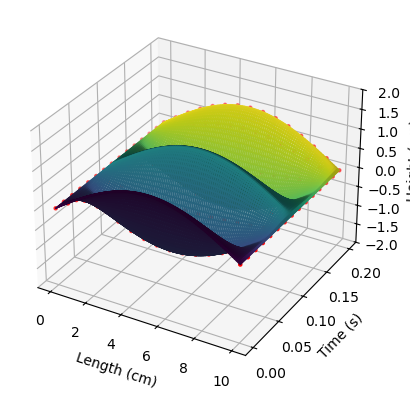

optimized wavenumber: 0.31 optimized frequency: -62.83


In [7]:
# a good first guess is important. 
#for this one, k should be less than 1 and w should be between -50 and -100.
initial_guess = {'A': 2.0 ,'k': 0.3  ,'w': -60  ,'p1': 0  ,'p2': 0 }
params = fit_curve(data_1,initial_guess)
A1,k1,w1,p11,p21 = params 
print(f"optimized wavenumber: {k1:.2f} optimized frequency: {w1:.2f}")

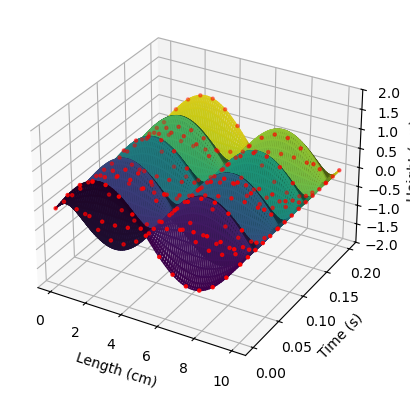

optimized wavenumber: 0.63 optimized frequency: -125.66


In [8]:
#increase w and k relative to the last one.
initial_guess = {'A': 1.0 ,'k': 0.6  ,'w': -100  ,'p1': 0  ,'p2': 0 }
params = fit_curve(data_2,initial_guess)
A2,k2,w2,p12,p22 = params 
print(f"optimized wavenumber: {k2:.2f} optimized frequency: {w2:.2f}")

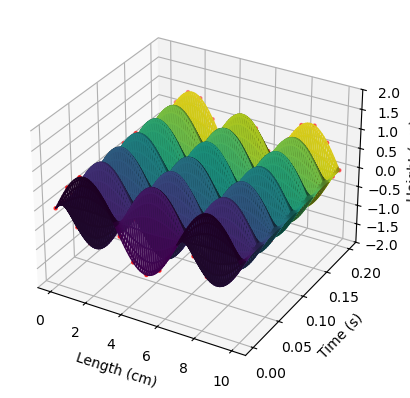

optimized wavenumber: 0.94 optimized frequency: -188.50


In [9]:
initial_guess = {'A': 1.0 ,'k': 1.0  ,'w': -180  ,'p1': 0  ,'p2': 0 }
params = fit_curve(data_3,initial_guess)
A3,k3,w3,p13,p23 = params 
print(f"optimized wavenumber: {k3:.2f} optimized frequency: {w3:.2f}")

### SHORT RESPONSE QUESTIONS
1. Did you run into any trouble with the curve fitting procedure? Why do you think this is?
2. Explain the importance of the initial guess with respect to numerically fitting a curve.
### ANSWERS


1. Yes, for some of the initial guesses the curve that was fit looked very different from the experimental points. This is probably because the solver found a false minimum since the first guess was too far from the true answer. __(IT IS OKAY IF STUDENTS DON'T KNOW THIS! but they should think about it.)__
2. A good initial guess is necessary or else the algorithm for fitting the curve might not find the best solution.

<br/><br/>
<!--  -->

## PART 2 - QUANTIZATION
As can be seen, standing waves are an interesting case as only specific wavenumbers / wavelengths satisfy the boundary conditions of the system.  
This mirrors a fundamental concept in quantum mechanics: the quantization of physical properties like energy and momentum.  
In this section, you will examine the allowed wavenumbers and frequencies for a standing wave and the relationships between them. 

### CODE
* Plot wavenumber and frequency versus harmonic number.   

In [10]:
harmonics   = [1,2,3]
wavenumbers = [k1,k2,k3]
frequencies = np.abs(np.array([w1,w2,w3]))

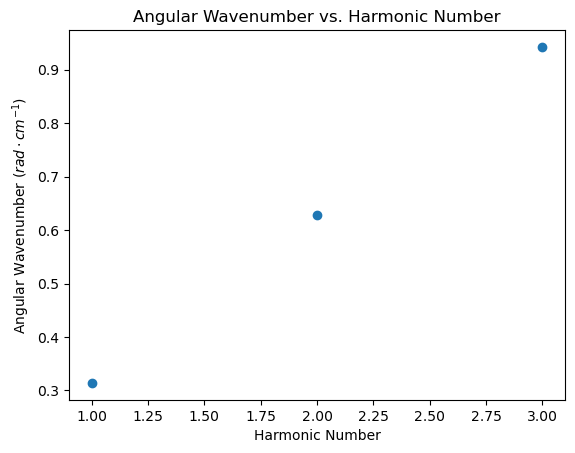

k = 0.31 * n + -0.00


In [11]:
plt.scatter(harmonics,wavenumbers) #students choose what to plot, the rest is given
plt.title('Angular Wavenumber vs. Harmonic Number')
plt.xlabel('Harmonic Number')
plt.ylabel('Angular Wavenumber ($rad \cdot{} cm^{-1}$)')
plt.show()
k_slope,k_int = np.polyfit(harmonics,wavenumbers,1)
print(f'k = {k_slope:.2f} * n + {k_int:.2f}')

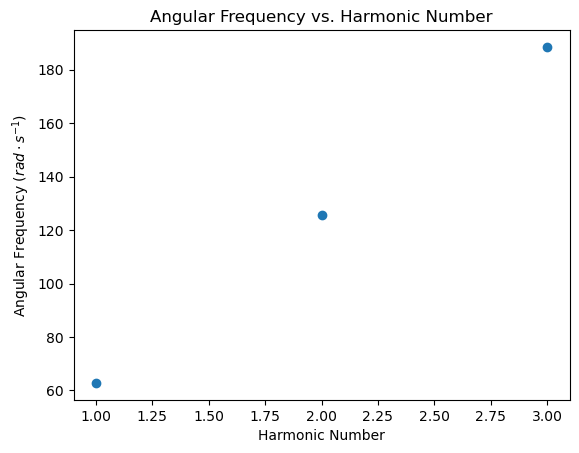

w = 62.83 * n + -0.00


In [13]:

plt.scatter(harmonics,frequencies) #students choose what to plot, rest is given
plt.title('Angular Frequency vs. Harmonic Number')
plt.xlabel('Harmonic Number')
plt.ylabel('Angular Frequency ($rad \cdot{} s^{-1}$)')
plt.show()
w_slope,w_int = np.polyfit(harmonics,frequencies,1)
print(f'w = {w_slope:.2f} * n + {w_int:.2f}')

### SHORT RESPONSE QUESTIONS
1. What expression did you obtain for wavenumber? For frequency? What do these expressions tell us?
2. In the context of chemistry, how does quantization explain atomic spectra? 
### ANSWERS

1. We obtain the following expressios: $k = 0.31 \cdot{} n$, $w = 62.83 \cdot{} n$ and these tell us that all allowed wavenumbers and frequencies for a classical standing wave are integer multiples of the lowest wavenumber and frequency respectively.
2. Because there are only certain allowed energy levels for atomic orbitals, there are necessarily only certain differences between them. This means that only photons with certain energy levels will be absorbed, resulting in line spectra.

<br/><br/>
<!--  -->

## PART 3 - STANDING WAVES ON A SPHERE
We have seen how quantization might necessarily arise from the nature of waves, but it may not be completely intutive how this relates to chemistry yet.  
This may become more clear if we consider what wave quantization looks like on a spherical surface.

### GIVEN FUNCTIONS
* Execute the blocks containing the given functions. Don't modify these.  
(Adapted from: https://github.com/DalInar/schrodingers-snake)  

In [31]:
from scipy.special import sph_harm
import mpl_toolkits.mplot3d.axes3d as axes3d
import matplotlib.colors as mcolors

def plot_spherical_harmonic(l,m):
    '''
    adapted from code at https://github.com/DalInar/schrodingers-snake
    '''
    thetas = np.linspace(0, np.pi, 20)
    phis = np.linspace(0, 2*np.pi, 20)
    
    (Theta,Phi)=np.meshgrid(thetas,phis) 
    s_harm=sph_harm(m, l, Phi, Theta)
       
    R = abs(s_harm.real) #modified this to show only real part of spherical harmonic, to make connection to atomic orbitals more explicit
    X = R * np.sin(Theta) * np.cos(Phi)
    Y = R * np.sin(Theta) * np.sin(Phi)
    Z = R * np.cos(Theta)

    vmin = -1
    vmax = 1
    cmap = plt.get_cmap('jet')
    norm = mcolors.Normalize(vmin=Z.min(), vmax=Z.max())
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),facecolors=cmap(norm(R)),
        linewidth=0, antialiased=False, alpha=0.4)
    # ax.set_aspect('equal')
    plt.title(r'Real Part of Spherical Harmonics, $Y_l^m(\theta,\phi)$'+r', $l=$'+str(l)+r', $m=$'+str(m))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.ylabel(r'$z$')
    
    plt.show()

### CODE
* Using the provided function, explore different combinations of integer inputs.  

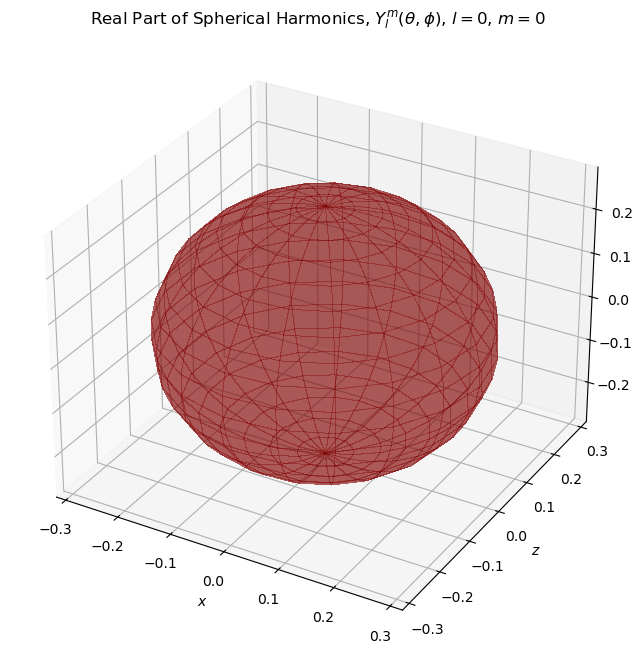

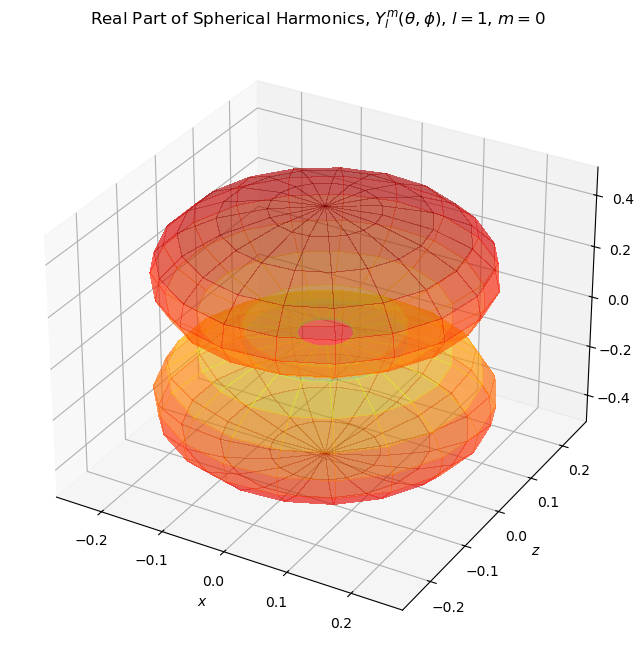

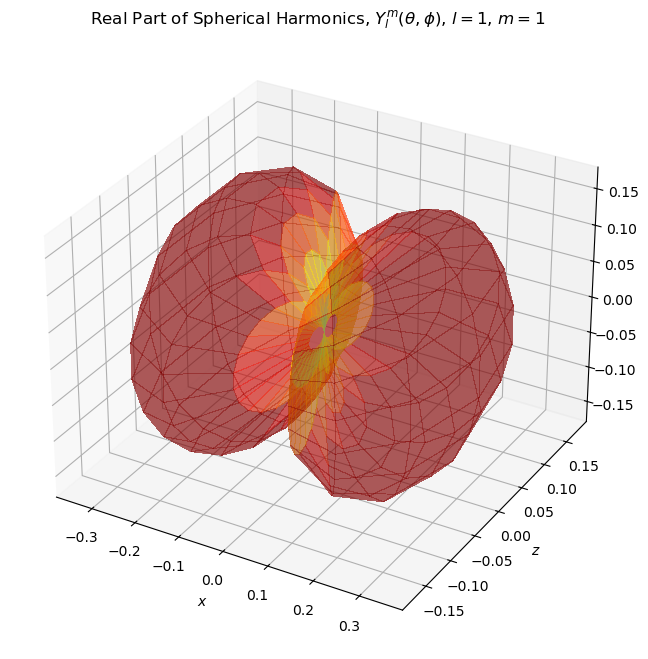

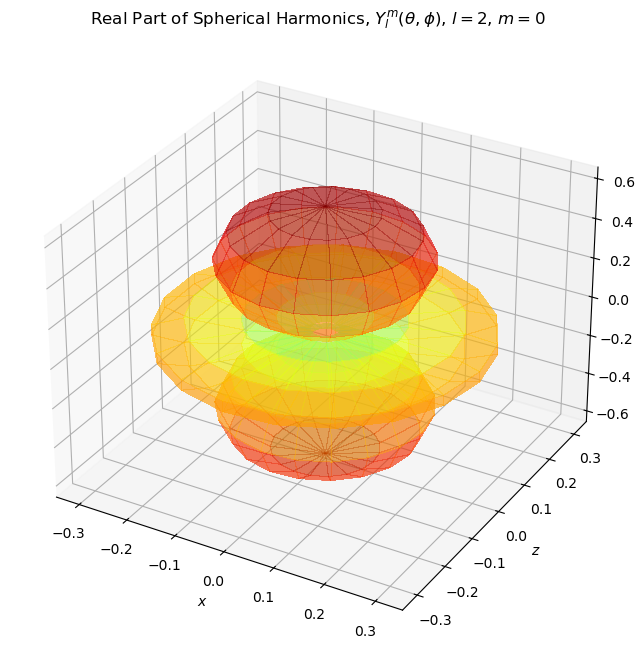

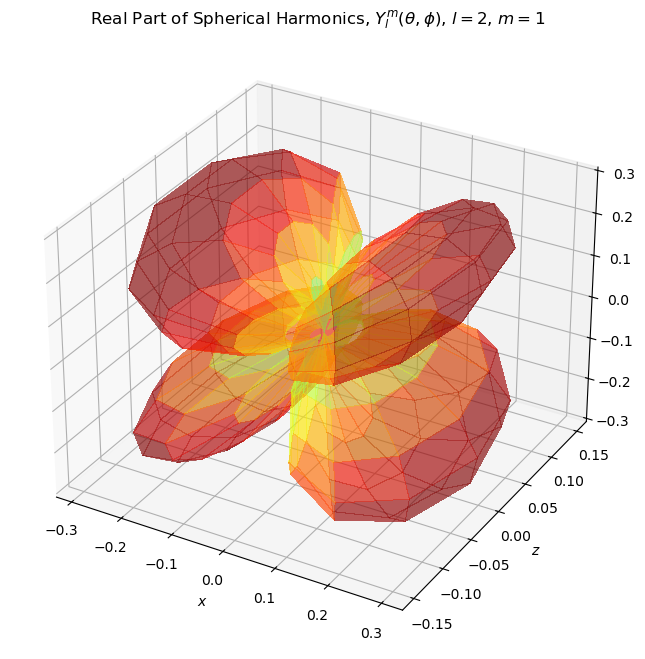

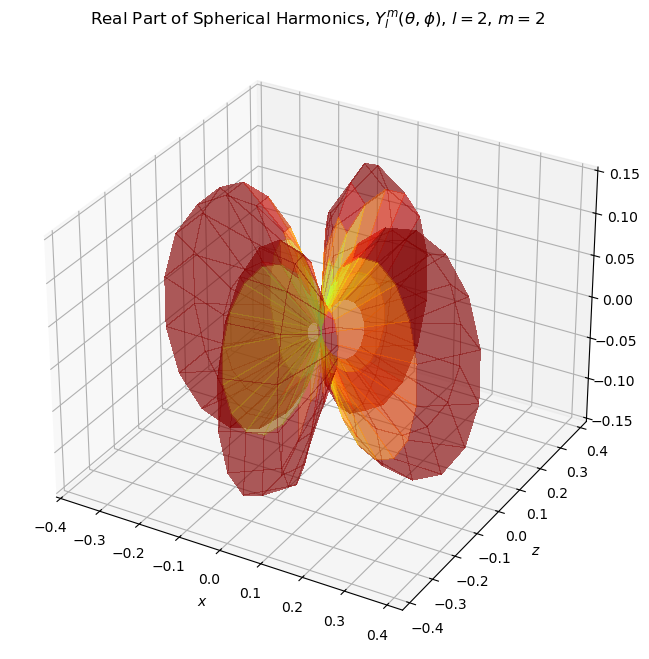

In [32]:
plot_spherical_harmonic(0,0)
plot_spherical_harmonic(1,0)
plot_spherical_harmonic(1,1)
plot_spherical_harmonic(2,0)
plot_spherical_harmonic(2,1)
plot_spherical_harmonic(2,2)

### SHORT RESPONSE QUESTIONS
1. Where do you recognize these shapes from?  
2. These are not quite what you recognize- These only have wave components depending on $\theta$ and $\phi$. What is the missing wave component?
### ANSWER

1. These are the characteristic shapes of the s, p, and d atomic orbitals!
2. The missing part is the radial component of the wave, whose amplitude depends on distance from the center and not on angle around the sphere.

<br/><br/>
<br/><br/>
<!--  -->

# REFLECTION

### SHORT RESPONSE QUESTIONS
1. Explain the importance of approximate math and iterative algorithms in the context of computational science.
2. Explain the concept of emergent behavior and provide an example besides those presented here.
3. Explain the connection between quantum mechanics and classical wave mechanics.
### ANSWERS

1. These kinds of algorithms are very necessary because some things are impossible to calculate exactly, like many body problems or quantum mechanics.
2. Emergent behavior happens when complex behavior arises from interactions between simple things. Another would be the gas laws, which can be understood as arising from statistics and Newton's laws acting on very large numbers of individual particles.
3. Quantum mechanics tells us that fundamental particles have both wave and particle nature. Just like classical standing waves only have certain allowed configurations, so too do quantum particles, because of their wave nature.